In [144]:
from keras.utils import np_utils
import numpy as np
from glob import glob
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [145]:
''' load faces into input variable'''
## input contains the dataset

import os

def load_dataset(path, input, input_target):
    img = cv2.imread(path)
    
    if img is None:
        print("Image not found!")
    else:
        img = cv2.resize(img,(32,32))
        input.append(img)
        input_target.append(path)
    return input

input = []
input_target = []

for i in glob('dataset/peakImages/*'):
    input = load_dataset(i, input, input_target)

input = np.array(input)
input_target = np.array(input_target)

print(input.shape, input_target.shape)

(428, 32, 32, 3) (428,)


In [146]:

input.shape[1:]

(32, 32, 3)

In [156]:
# size of original image

img = cv2.imread('dataset/peakImages/1_1_116.jpg')
# plt.imshow(img)
img.shape

(1080, 1920, 3)

In [147]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(input, input_target, test_size=0.23)

print(trainX.shape, testX.shape, trainY.shape, testY.shape)


(329, 32, 32, 3) (99, 32, 32, 3) (329,) (99,)


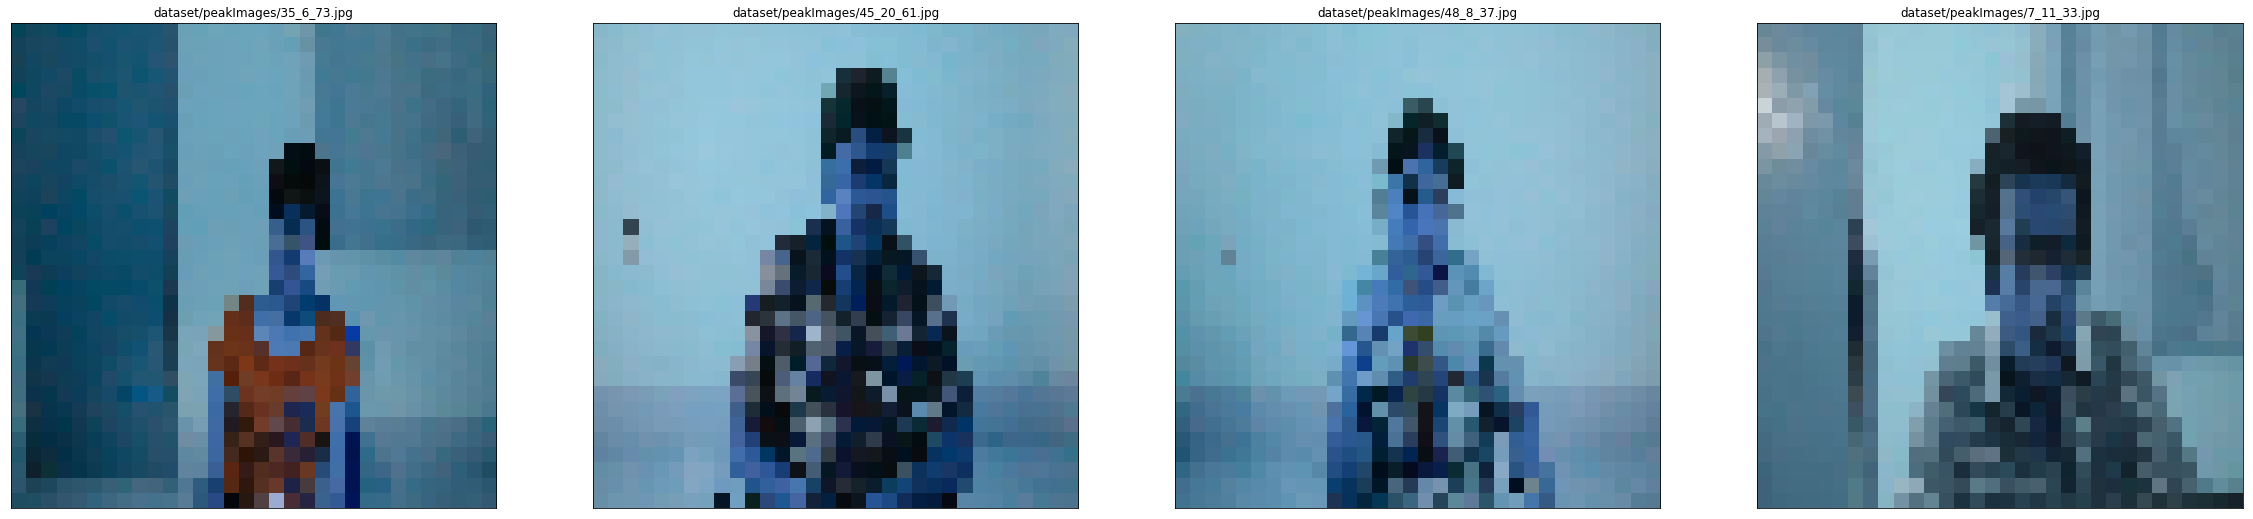

In [148]:
# plot first six training images
fig = plt.figure(figsize=(40,40))

for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(trainX[i], cmap='gray')
    ax.set_title(str(trainY[i]))

In [149]:
## Rescaling 

trainX = trainX.astype('float32')/255
testX = testX.astype('float32')/255


In [158]:
def detect_face(img, num_of_faces):
    # make an object to detect face
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
    # read image
    img = cv2.imread(img)
    # convert image from bgr to gray
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # resize image
    img_gray = cv2.resize(img_gray, (800,800))
    
    # detect face
    faces = face_cascade.detectMultiScale(img_gray)
    
    # counting number of faces detected
    if len(faces) == 4 :
        num_of_faces+=1
        
    return num_of_faces

num_of_faces = 0
for img in glob('dataset/peakImages/*'):
    num_of_faces = detect_face(img, num_of_faces)    

num_of_faces


0

In [107]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=input.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(10, activation='softmax'))
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               1024500   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
Total para